<H1> Etude de cas - Exploratory data analysis </H1>

In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import prince
from sklearn import manifold 
import scipy 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.model_selection import cross_val_score

import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import SGD

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<H3> Loading and arranging data set </H3>

In [268]:
data = pd.read_csv('final_df_kmeans.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,Deodorants.ICOS1,EauDeToilette.ICOS2,ProdSoinCheveux.ICOS3,ProdSoinVisage.ICOS4,VernisOngleDissolv.ICOS5,DesodoAutreEnsens.QPD2b,ACTIVITE,VoitureDansGarage.DGG3n,Fumeurs.FUMEURn,Plantes.QPV,...,Type_Prof,Occupation,Source_ppale_Res,Structure_menage,HSRF,NIACe1,CHEM1,DCA3e1,FC316,Formaldehyde_bin
0,10.5,14.0,0.0,7.0,0.0,0.0,3.15,4,3,1,...,6,1,1,3,12,1914,1,3,1,2
1,14.0,14.0,1.0,7.0,0.5,0.0,5.25,4,2,2,...,4,1,1,2,70,1961,1,3,1,2
2,7.0,7.0,0.0,7.0,0.0,0.0,2.35,4,1,1,...,5,1,1,1,40,1914,1,3,1,1
3,0.0,1.0,0.5,7.0,1.0,0.0,2.10,4,1,1,...,3,1,1,2,75,1967,1,3,1,2
4,14.0,10.5,10.5,7.0,0.0,7.0,7.00,4,2,2,...,6,1,1,3,50,1974,1,2,1,1


In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 31 columns):
Deodorants.ICOS1                     530 non-null float64
EauDeToilette.ICOS2                  530 non-null float64
ProdSoinCheveux.ICOS3                530 non-null float64
ProdSoinVisage.ICOS4                 530 non-null float64
VernisOngleDissolv.ICOS5             530 non-null float64
DesodoAutreEnsens.QPD2b              530 non-null float64
ACTIVITE                             530 non-null float64
VoitureDansGarage.DGG3n              530 non-null int64
Fumeurs.FUMEURn                      530 non-null int64
Plantes.QPV                          530 non-null int64
TraitementParasitesAnimaux.ANTCPn    530 non-null int64
SortirOrduresExterieur.QOM1          530 non-null int64
Bricolage.TMG6n                      530 non-null int64
Jardinage.TMG7n                      530 non-null int64
Age                                  530 non-null int64
Revenus                              530 

In [270]:
# get quant vars only
data_quant = data[['Deodorants.ICOS1', 'EauDeToilette.ICOS2', 'ProdSoinCheveux.ICOS3', 'ProdSoinVisage.ICOS4', 'VernisOngleDissolv.ICOS5', 'DesodoAutreEnsens.QPD2b', 'ACTIVITE', 'NIACe1', 'HSRF', 'Age', 'Revenus', 'Formaldehyde_bin']]
data_quant.head()

,Deodorants.ICOS1,EauDeToilette.ICOS2,ProdSoinCheveux.ICOS3,ProdSoinVisage.ICOS4,VernisOngleDissolv.ICOS5,DesodoAutreEnsens.QPD2b,ACTIVITE,NIACe1,HSRF,Age,Revenus,Formaldehyde_bin
0,10.5,14.0,0.0,7.0,0.0,0.0,3.15,1914,12,43,817,2
1,14.0,14.0,1.0,7.0,0.5,0.0,5.25,1961,70,42,2349,2
2,7.0,7.0,0.0,7.0,0.0,0.0,2.35,1914,40,36,1299,1
3,0.0,1.0,0.5,7.0,1.0,0.0,2.10,1967,75,43,4249,2
4,14.0,10.5,10.5,7.0,0.0,7.0,7.00,1974,50,38,817,1


In [271]:
# get qual vars only
data_qual = data.drop(columns=['Deodorants.ICOS1', 'EauDeToilette.ICOS2', 'ProdSoinCheveux.ICOS3', 'ProdSoinVisage.ICOS4', 'VernisOngleDissolv.ICOS5', 'DesodoAutreEnsens.QPD2b', 'ACTIVITE', 'NIACe1', 'HSRF', 'Age', 'Revenus'])
data_qual.head()

,VoitureDansGarage.DGG3n,Fumeurs.FUMEURn,Plantes.QPV,TraitementParasitesAnimaux.ANTCPn,SortirOrduresExterieur.QOM1,Bricolage.TMG6n,Jardinage.TMG7n,Nb_Person,Nb_Enfants_inf_10,Nb_Enfants_sup_10,Sexe,Diplome_Max,Type_Prof,Occupation,Source_ppale_Res,Structure_menage,CHEM1,DCA3e1,FC316,Formaldehyde_bin
0,4,3,1,3,1,1,1,2,0,0,2,1,6,1,1,3,1,3,1,2
1,4,2,2,1,1,1,1,2,0,1,1,7,4,1,1,2,1,3,1,2
2,4,1,1,3,1,1,1,1,0,0,2,8,5,1,1,1,1,3,1,1
3,4,1,1,3,1,3,3,3,2,0,1,9,3,1,1,2,1,3,1,2
4,4,2,2,3,1,4,1,3,1,0,2,4,6,1,1,3,1,2,1,1


In [272]:
# split into cluster groups
cluster_df = pd.read_csv('clusters.csv')
cluster_df.drop(columns=['Unnamed: 0'], inplace=True)

# add to dfs
data['cluster'] = cluster_df['cluster']
data_quant['cluster'] = cluster_df['cluster']
data_qual['cluster'] = cluster_df['cluster']

# extract rows corresponding to each cluster and store in separate df variables
clust1 = data_quant[data['cluster'] == 1]
clust2 = data_quant[data['cluster'] == 2]
clust3 = data_quant[(data['cluster'] == 3) | (data['cluster'] == 4)]
# clust4 = data[data['cluster'] == 4]
clust3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 528
Data columns (total 13 columns):
Deodorants.ICOS1            325 non-null float64
EauDeToilette.ICOS2         325 non-null float64
ProdSoinCheveux.ICOS3       325 non-null float64
ProdSoinVisage.ICOS4        325 non-null float64
VernisOngleDissolv.ICOS5    325 non-null float64
DesodoAutreEnsens.QPD2b     325 non-null float64
ACTIVITE                    325 non-null float64
NIACe1                      325 non-null int64
HSRF                        325 non-null int64
Age                         325 non-null int64
Revenus                     325 non-null int64
Formaldehyde_bin            325 non-null int64
cluster                     325 non-null int64
dtypes: float64(7), int64(6)
memory usage: 35.5 KB


<H3> Gradient boosted regression trees </H3>

In [274]:
from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

cluster_list = [clust1, clust2, clust3]

# run gradient boosting on each cluster
for clust in cluster_list:

    # convert df to np arrays
    # X = data.drop(columns=['Formaldehyde_bin']).values
    X = clust.drop(columns=['Formaldehyde_bin', 'cluster']).values

    X = X.astype(np.float32)
    # print(X)
    # y = data['Formaldehyde_bin'].values
    y = clust['Formaldehyde_bin'].values
    # print(y)

    # split into train/test sets
#     test_size = 0.2
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=9)
    # print(y_train)
    # print(y_test)
    
    # Fit classifier with out-of-bag estimates
    params = {'n_estimators': 150, 'max_depth': 5, 'subsample': 0.5,
              'learning_rate': 0.04, 'min_samples_leaf': 2, 'max_features': 2, 'random_state': 42}
    clf = ensemble.GradientBoostingClassifier(**params)
    
    cvscore = cross_val_score(clf, X, y, cv=10)
    print(cvscore)
    print(np.mean(cvscore))

#     clf.fit(X_train, y_train)
#     acc = clf.score(X_test, y_test)
#     # acc = clf.score(X_train, y_train)
#     print("Accuracy: {:.4f}".format(acc))

[ 0.44444444  0.66666667  0.55555556  0.55555556  0.55555556  0.57142857
  0.71428571  0.33333333  0.5         0.33333333]
0.523015873016
[ 0.4         0.35714286  0.35714286  0.42857143  0.30769231  0.66666667
  0.66666667  0.41666667  0.54545455  0.45454545]
0.460054945055
[ 0.38235294  0.32352941  0.42424242  0.42424242  0.42424242  0.3125
  0.4375      0.5         0.5483871   0.35483871]
0.413183543212


In [263]:
# run gradient boosting on whole dataset
# X = data.drop(columns=['Formaldehyde_bin', 'cluster']).values
# y = data['Formaldehyde_bin'].values

# X = data_quant.drop(columns=['Formaldehyde_bin', 'cluster']).values
# y = data_quant['Formaldehyde_bin'].values

# get 0.33 acc with just these two
X = data_quant[['NIACe1', 'HSRF']]
y = data_quant['Formaldehyde_bin'].values

# X = data_qual.drop(columns=['Formaldehyde_bin', 'cluster']).values
# y = data_qual['Formaldehyde_bin'].values

# these 5 qual have same accuracy as ALL qual
# X = data_qual[['VoitureDansGarage.DGG3n','Fumeurs.FUMEURn','Bricolage.TMG6n','Jardinage.TMG7n']].values
# y = data_qual['Formaldehyde_bin'].values

# split into train/test sets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=9)

# Fit classifier with out-of-bag estimates
params = {'n_estimators': 150, 'max_depth': 5, 'subsample': 0.5,
          'learning_rate': 0.04, 'min_samples_leaf': 2, 'max_features': 2, 'random_state': 42}
clf = ensemble.GradientBoostingClassifier(**params)

cvscore = cross_val_score(clf, X_train, y_train, cv=10)
print(cvscore)
print(np.mean(cvscore))

# clf.fit(X_train, y_train)
# acc = clf.score(X_test, y_test)
# # acc = clf.score(X_train, y_train)
# print("Accuracy: {:.4f}".format(acc))

# X_train_pred = clf.predict(X_train)
# print(X_train_pred)
# print(y_train)

# X_test_pred = clf.predict(X_test)
# print(X_test_pred)
# print(y_test)

Accuracy: 0.3396


In [138]:
# use gridsearch to find optimal values for params:
# learningrate, subsample (sample bagging), max_features (feature bagging), n_estimators, max_depth

# Define classifier with initial params
init_params = {'n_estimators': 500, 'max_depth': 1, 'subsample': 0.1, 'learning_rate': 0.1, 'max_features': 1,
               'min_samples_leaf': 1, 'random_state': 42}
gbmodel = ensemble.GradientBoostingClassifier(**init_params)

# Define sequences of parameters to try
# n_estimators=[500, 1000, 2000, 4000]
# max_depth=[1, 2, 3, 5, 10]
# subsample=[0.1, 0.3, 0.5, 0.8]
# learning_rate=[0.1, 0.3, 0.5, 0.8]
# max_features=[1, 2, 3, 5, 10]
# min_samples_leaf=[1, 2, 5]

n_estimators=[150]
max_depth=[5]
subsample=[0.5]
learning_rate=[0.04]
max_features=[2]
min_samples_leaf=[2]

# add sequences to paramater grid for gridsearch
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, subsample=subsample, learning_rate=learning_rate,
                 max_features=max_features, min_samples_leaf=min_samples_leaf)

# create stratified splits
strat = StratifiedShuffleSplit(n_splits=5, test_size=0.2)

# find the combination of parameters that produces the lowest error, and fit this model
GB_cv = GridSearchCV(gbmodel, param_grid=param_grid, cv=strat)
GB_cv.fit(Xtrain,y)

# show the best parameters selected for the GB model
print("Parameters, accuracy and score from Kernel:")
print("")
print("   Tuned Parameters: {}".format(GB_cv.best_params_))
print("   Tuned Accuracy: {}".format(GB_cv.best_score_))

# train the model with the best parameters
GB_cv_best = ensemble.GradientBoostingClassifier(n_estimators=GB_cv.best_params_["n_estimators"], 
                                    max_depth=GB_cv.best_params_["max_depth"], 
                                    subsample=GB_cv.best_params_["subsample"], 
                                    learning_rate=GB_cv.best_params_["learning_rate"],
                                    max_features=GB_cv.best_params_["max_features"],
                                    min_samples_leaf=GB_cv.best_params_["min_samples_leaf"],
                                    random_state=12)

GB_cv_best.fit(X_train, y_train)
acc = GB_cv_best.score(X_test, y_test)
print("Accuracy of best model: {:.4f}".format(acc))

Parameters, accuracy and score from Kernel:

   Tuned Parameters: {'learning_rate': 0.04, 'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 150, 'subsample': 0.5}
   Tuned Accuracy: 0.44150943396226416
Accuracy of best model: 0.4151


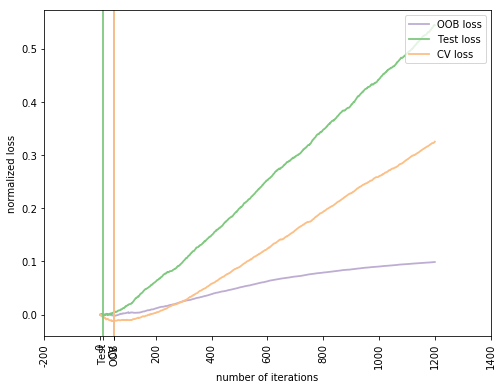

In [88]:
# OOB estimation of number of iterations needed

n_estimators = params['n_estimators']
x = np.arange(n_estimators) + 1


def heldout_score(clf, X_test, y_test):
    """compute deviance scores on ``X_test`` and ``y_test``. """
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        score[i] = clf.loss_(y_test, y_pred)
    return score


def cv_estimate(n_splits=3):
    cv = KFold(n_splits=n_splits)
    cv_clf = ensemble.GradientBoostingClassifier(**params)
    val_scores = np.zeros((n_estimators,), dtype=np.float64)
    for train, test in cv.split(X_train, y_train):
        cv_clf.fit(X_train[train], y_train[train])
        val_scores += heldout_score(cv_clf, X_train[test], y_train[test])
    val_scores /= n_splits
    return val_scores


# Estimate best n_estimator using cross-validation
cv_score = cv_estimate(3)

# Compute best n_estimator for test data
test_score = heldout_score(clf, X_test, y_test)

# negative cumulative sum of oob improvements
cumsum = -np.cumsum(clf.oob_improvement_)

# min loss according to OOB
oob_best_iter = x[np.argmin(cumsum)]

# min loss according to test (normalize such that first loss is 0)
test_score -= test_score[0]
test_best_iter = x[np.argmin(test_score)]

# min loss according to cv (normalize such that first loss is 0)
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]

# color brew for the three curves
oob_color = list(map(lambda x: x / 256.0, (190, 174, 212)))
test_color = list(map(lambda x: x / 256.0, (127, 201, 127)))
cv_color = list(map(lambda x: x / 256.0, (253, 192, 134)))

# plot curves and vertical lines for best iterations
fig = plt.figure(figsize=(8,6))
plt.plot(x, cumsum, label='OOB loss', color=oob_color)
plt.plot(x, test_score, label='Test loss', color=test_color)
plt.plot(x, cv_score, label='CV loss', color=cv_color)
plt.axvline(x=oob_best_iter, color=oob_color)
plt.axvline(x=test_best_iter, color=test_color)
plt.axvline(x=cv_best_iter, color=cv_color)

# add three vertical lines to xticks
xticks = plt.xticks()
xticks_pos = np.array(xticks[0].tolist() +
                      [oob_best_iter, cv_best_iter, test_best_iter])
xticks_label = np.array(list(map(lambda t: int(t), xticks[0])) +
                        ['OOB', 'CV', 'Test'])
ind = np.argsort(xticks_pos)
xticks_pos = xticks_pos[ind]
xticks_label = xticks_label[ind]
plt.xticks(xticks_pos, xticks_label, rotation=90)

plt.legend(loc='upper right')
plt.ylabel('normalized loss')
plt.xlabel('number of iterations')

plt.show()

<h3>Histograms of CAH Clusters</h3>

In [18]:
# change cluster 4 into cluster 3 to merge
data.loc[data['cluster'] == 4, 'cluster'] = 3

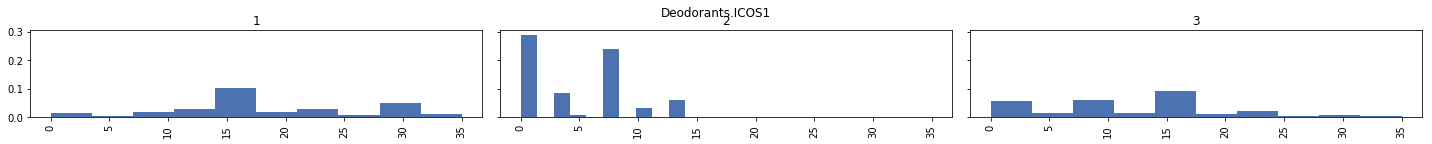

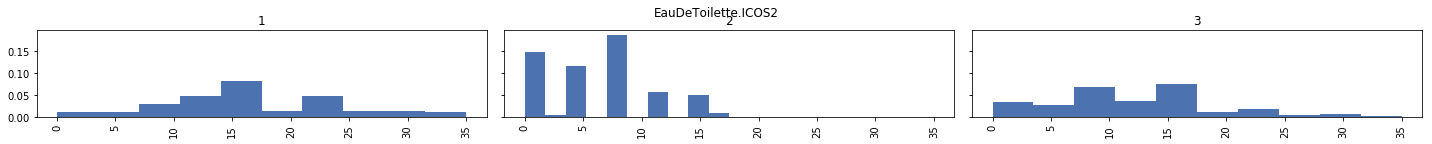

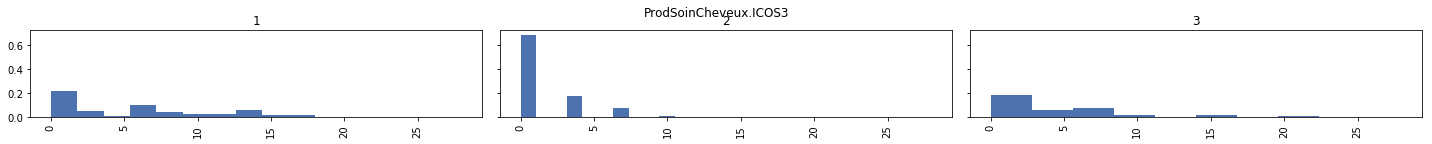

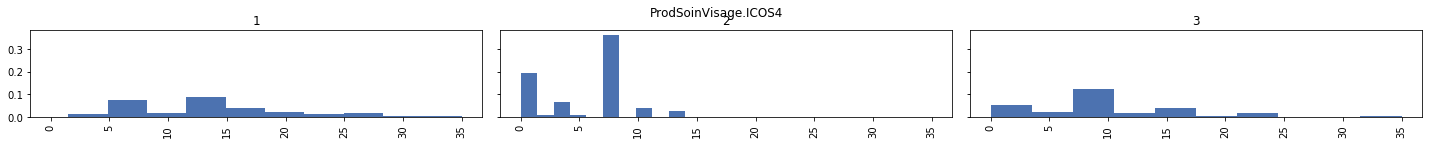

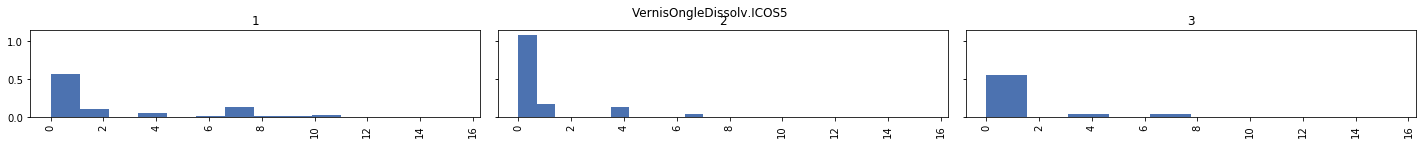

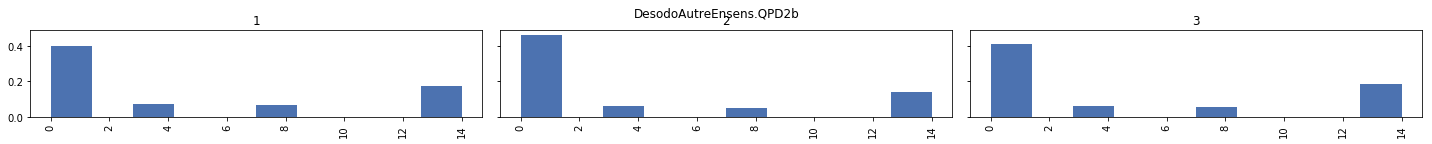

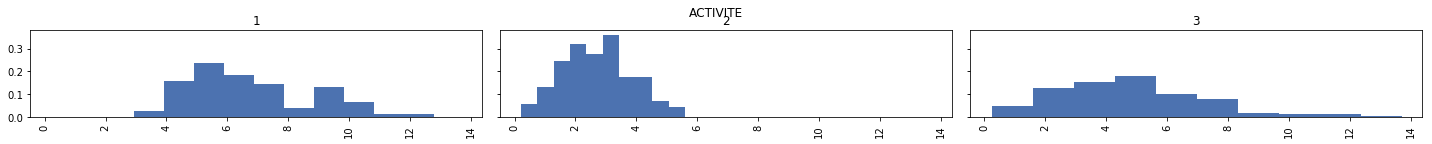

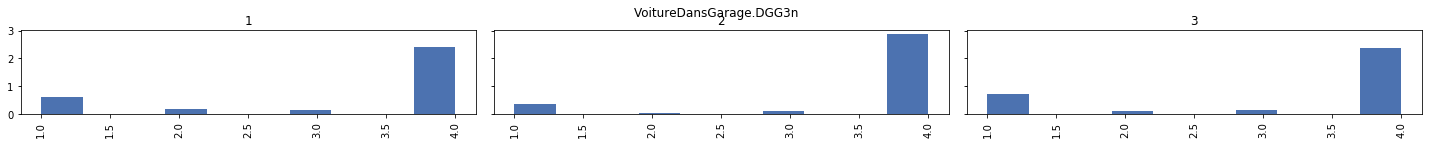

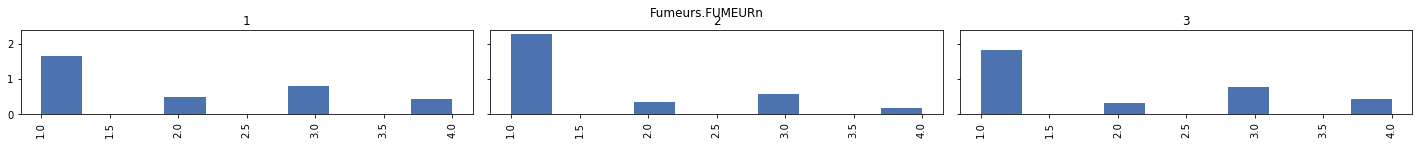

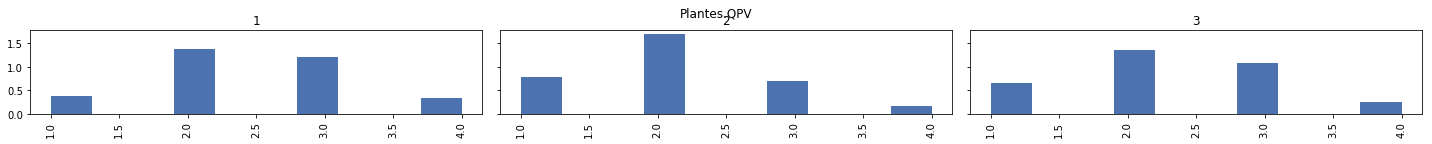

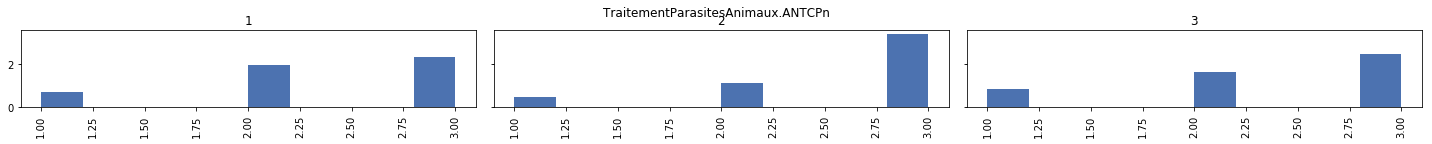

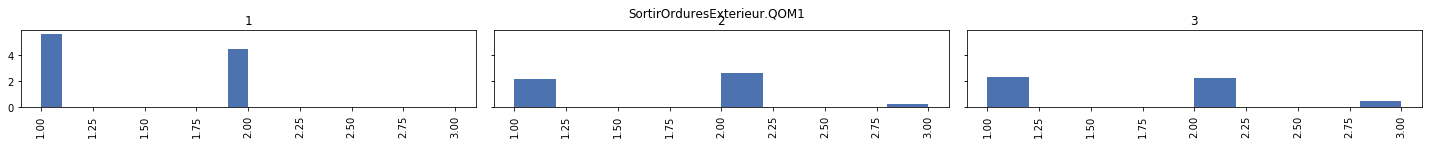

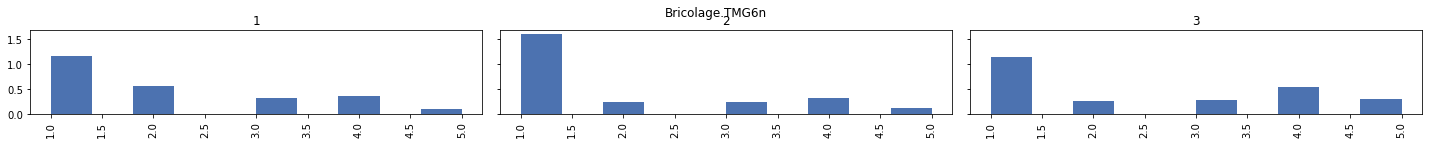

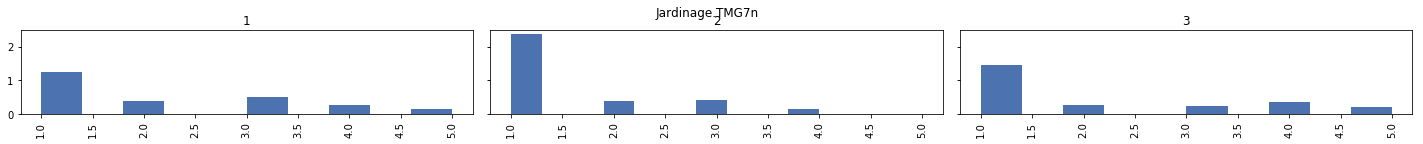

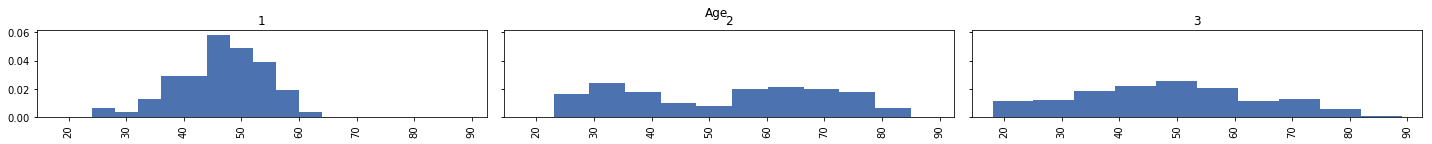

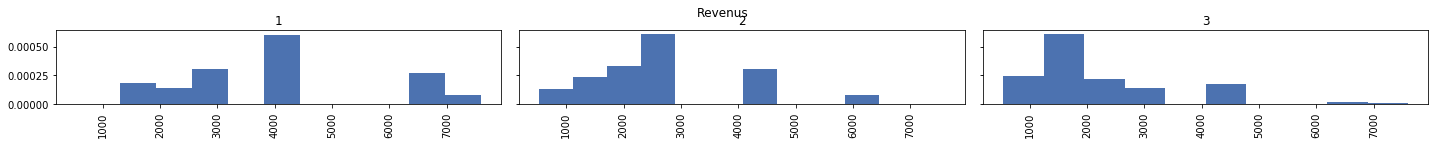

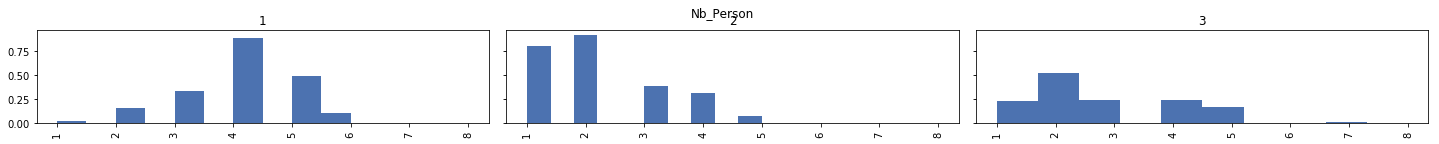

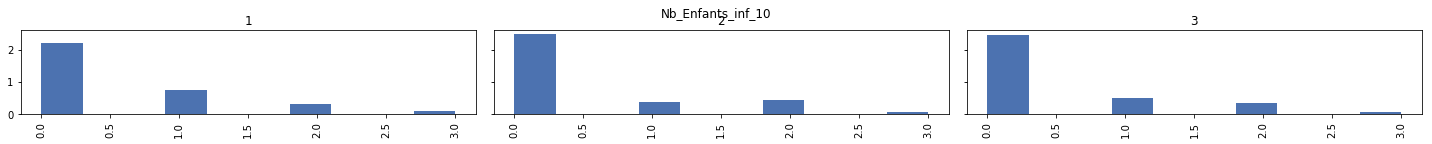

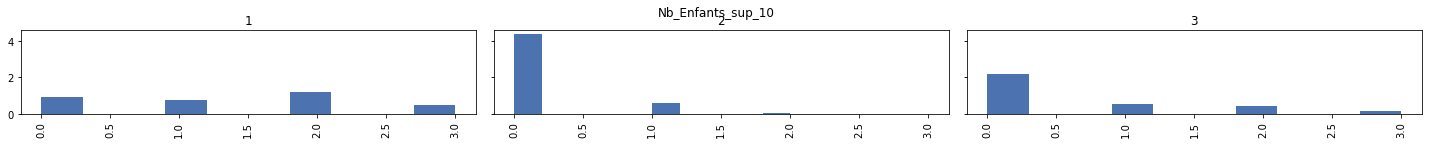

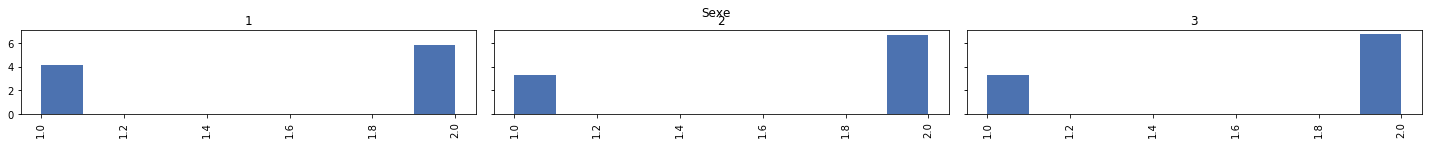

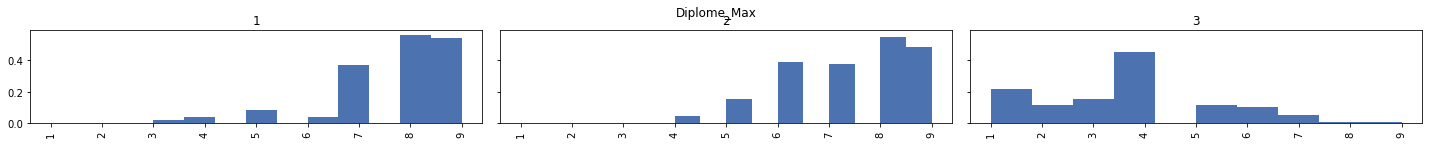

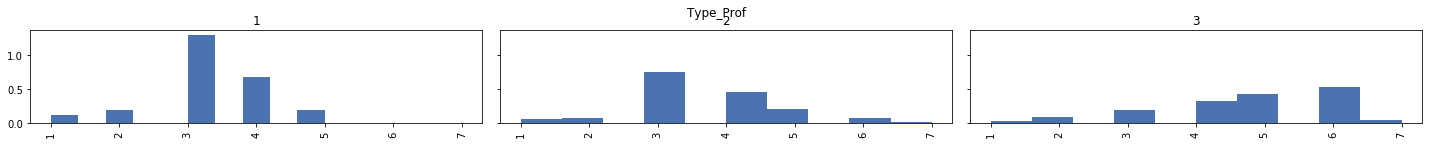

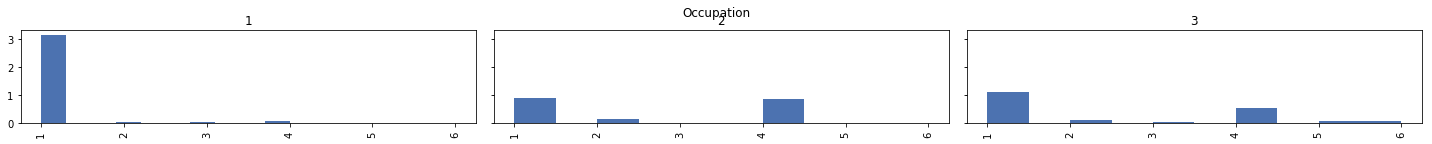

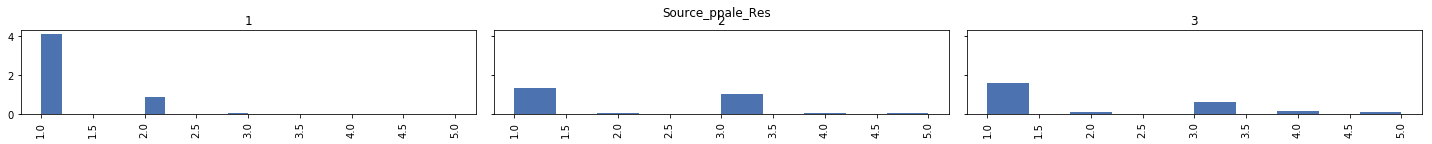

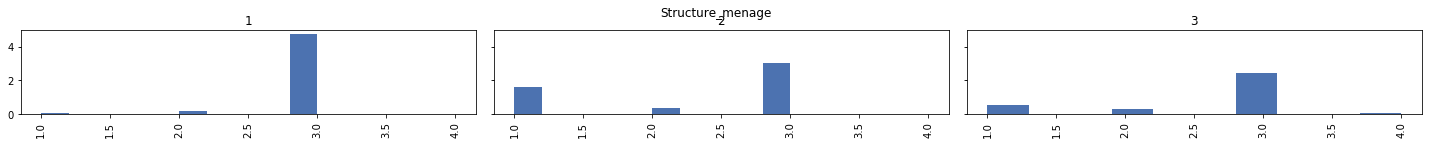

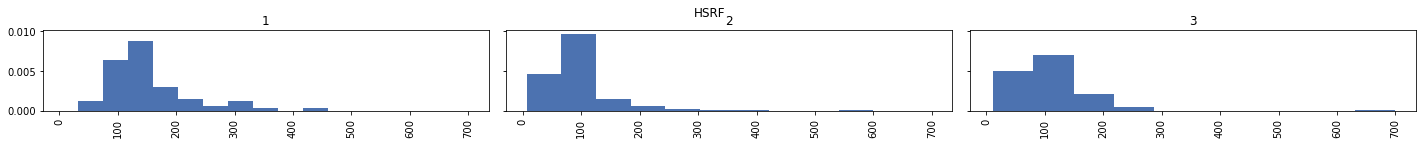

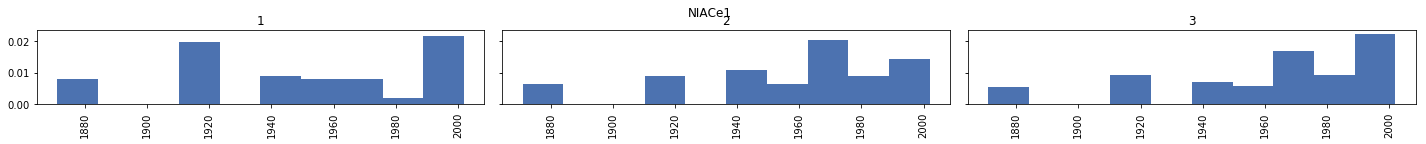

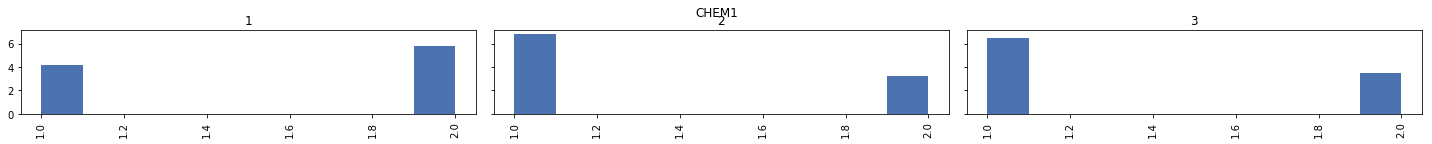

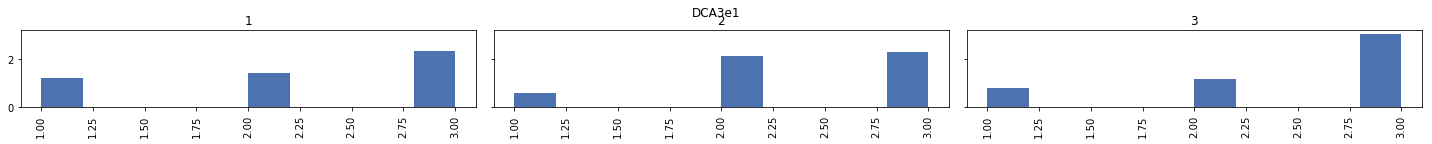

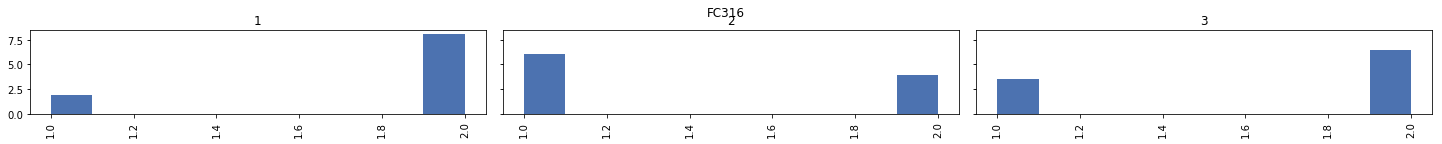

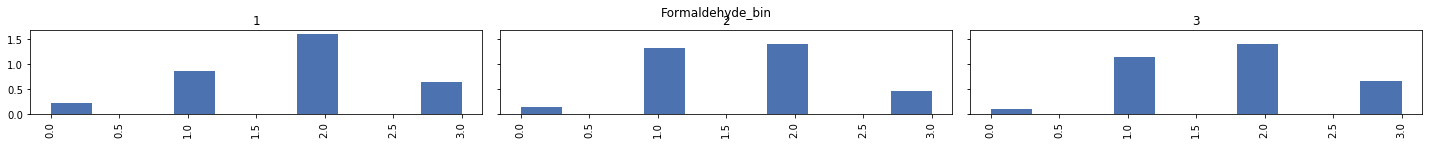

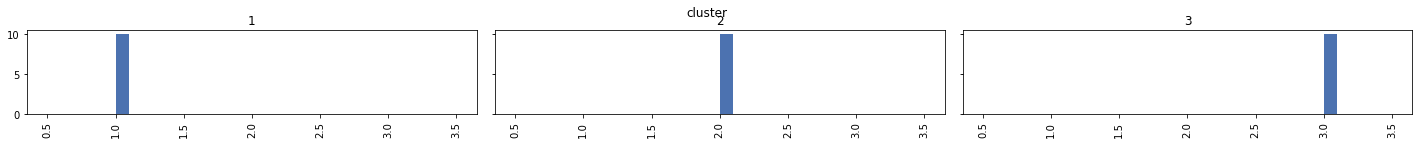

In [6]:
plt.style.use('seaborn-deep')

for i, column in enumerate(data):
    data[column].hist(figsize=(20, 2), by=data['cluster'], layout=(1, 3), sharey=True, sharex=True, normed=True);
    plt.tight_layout()
    plt.suptitle(column)
    plt.savefig('{}_{}.png'.format(i, column))

In [ ]:
# plot graphs of people with formaldehyde=very_high
formveryhigh = data[data['Formaldehyde_bin'] == 3]

plt.style.use('seaborn-deep')
plt.figure()

for i, column in enumerate(formveryhigh):
    formveryhigh[column].hist(figsize=(6, 2), by=data['Formaldehyde_bin'], layout=(1, 1), sharey=True, sharex=True, normed=True)
    plt.tight_layout()
    plt.suptitle(column)
    plt.savefig('fvh_{}_{}.png'.format(i, column))

<h3>Multiple Regression</h3>

In [292]:
# load the data
data_orig = pd.read_csv('final_df.csv')
data_orig.rename(columns={'Formldehyde':'Formaldehyde'}, inplace=True)

X = data.drop(columns=['Formaldehyde_bin', 'cluster'])
# X = data_orig[['NIACe1', 'Nb_Enfants_inf_10']]
X = X.astype(np.float32)
y = data_orig['Formaldehyde']

# X = data_quant.drop(columns=['Formaldehyde_bin', 'cluster']).values
# X = X.astype(np.float32)

Xs = scale(X)
ys = scale(y)

In [293]:
# use statsmodels to get the nice table
import statsmodels.api as sm
from sklearn.preprocessing import scale

# add an intercept (beta_0) to our model
Xint = sm.add_constant(Xs)
# train the model
model = sm.OLS(ys, Xint).fit()
# make the predictions by the model
predictions = model.predict(Xint)

# calc residuals
residuals = ys - predictions

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2.615
Date:                Fri, 09 Feb 2018   Prob (F-statistic):           1.05e-05
Time:                        14:31:18   Log-Likelihood:                -713.35
No. Observations:                 530   AIC:                             1489.
Df Residuals:                     499   BIC:                             1621.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.041e-17      0.042    2.5e-16      1.000      -0.082       0.082
x1             0.2602      0.097      2.685      0.007       0.070       0.451
x2             0.0148      0.083      0.178      0.859      -0.149       0.178
x3             0.0950      0.064      1.479      0.140      -0.031       0.221
x4             0.0081      0.082      0.098      0.922      -0.153       0.169
x5            -0.0742      0.049     -1.512      0.131      -0.171       0.022
x6            -0.0025      0.043     -0.057      0.954      -0.087       0.082
x7            -0.2017      0.199     -1.012      0.312      -0.593       0.190
x8            -0.0762      0.051     -1.480      0.139      -0.177       0.025
x9            -0.0171      0.046     -0.376      0.707      -0.107       0.073
x10           -0.0256      0.047     -0.541      0.589      -0.119       0.067
x11            0.0678      0.046      1.471      0.142      -0.023       0.158
x12           -0.0542      0.046     -1.177      0.240      -0.145       0.036
x13            0.0009      0.053      0.016      0.987      -0.103       0.105
x14            0.0384      0.053      0.729      0.466      -0.065       0.142
x15           -0.0087      0.063     -0.137      0.891      -0.133       0.116
x16            0.0062      0.055      0.114      0.910      -0.101       0.113
x17           -0.1659      0.194     -0.857      0.392      -0.547       0.215
x18            0.2037      0.116      1.760      0.079      -0.024       0.431
x19            0.0388      0.130      0.299      0.765      -0.216       0.294
x20           -0.0112      0.049     -0.228      0.820      -0.107       0.085
x21           -0.0376      0.049     -0.763      0.446      -0.134       0.059
x22           -0.0287      0.049     -0.588      0.557      -0.125       0.067
x23           -0.1256      0.070     -1.799      0.073      -0.263       0.012
x24           -0.0171      0.065     -0.263      0.792      -0.144       0.110
x25            0.0603      0.081      0.746      0.456      -0.099       0.219
x26           -0.0290      0.055     -0.527      0.598      -0.137       0.079
x27            0.1469      0.046      3.185      0.002       0.056       0.237
x28           -0.0245      0.051     -0.479      0.632      -0.125       0.076
x29           -0.0591      0.044     -1.338      0.182      -0.146       0.028
x30            0.0375      0.061      0.613      0.540      -0.083       0.158
==============================================================================
Omnibus:                      159.785   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              493.188
Skew:                           1.424   Prob(JB):                    8.05e-108
Kurtosis:                       6.771   Cond. No.                         15.2
==

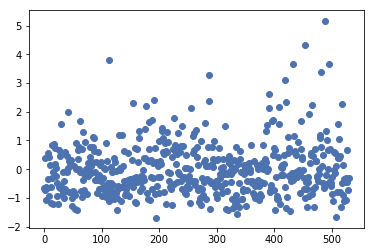

In [306]:
# plot residuals - should be randomly distributed around y=0 line
plt.figure()
plt.scatter(range(np.size(Xs, axis=0)), residuals)

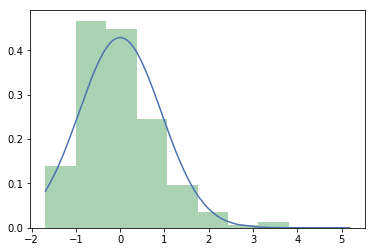

In [312]:
# plot histogram of residuals
import scipy.stats as stats
plt.figure()
h = sorted(residuals)
fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit)
plt.hist(residuals,alpha=0.5,normed=True)
plt.show()

In [287]:
# use sklearn to 
from sklearn import linear_model

# fit the model
lm = linear_model.LinearRegression()
model = lm.fit(Xs,ys)

# make predictions
predictions = lm.predict(Xs)
print(predictions[0:5])

[ 0.06647136 -0.07674884 -0.09131377  0.36407809  0.46713725]


In [288]:
# get R² score
lm.score(Xs,ys)

0.13583972451575632

In [289]:
# get regression coefficients
lm.coef_

array([ 0.26022795,  0.0147772 ,  0.09501114,  0.00805417, -0.07424205,
       -0.00247396, -0.201735  , -0.0761614 , -0.01714108, -0.02560513,
        0.06782196, -0.05421179,  0.00085274,  0.03839427, -0.00870981,
        0.00620803, -0.16593858,  0.20374992,  0.03878539, -0.01117533,
       -0.03756666, -0.02874332, -0.1255863 , -0.01705273,  0.06030054,
       -0.02902365,  0.14687283, -0.02445065, -0.05910179,  0.03749407])

In [290]:
# get intercept
lm.intercept_

3.4884336867689917e-16

<h3>Chi Square Values</h3>

In [108]:
from scipy.stats import chi2_contingency

qualvarlist = ['VoitureDansGarage.DGG3n', 'Fumeurs.FUMEURn','Plantes.QPV','TraitementParasitesAnimaux.ANTCPn','SortirOrduresExterieur.QOM1','Bricolage.TMG6n','Jardinage.TMG7n','Age','Revenus','Nb_Person','Nb_Enfants_inf_10','Nb_Enfants_sup_10','Sexe','Diplome_Max','Type_Prof','Occupation','Source_ppale_Res','Structure_menage','HSRF','NIACe1','CHEM1','DCA3e1','FC316']

# get chisq vals for all quar vars against formaldehyde
for var in qualvarlist:
    # Contingency table.
    contingency = pd.crosstab(data[var], data['Formaldehyde_bin'])

    # Chi-square test of independence.
    c, p, dof, expected = chi2_contingency(contingency)
    print("var={}, c={}, p={}".format(var, c, p))
    
# Significant vars:
# var=VoitureDansGarage.DGG3n, c=21.587253286874844, p=0.010283291007544665
# var=TraitementParasitesAnimaux.ANTCPn, c=12.002201780476465, p=0.06191970342434454
# var=Jardinage.TMG7n, c=25.271286617714452, p=0.013588372719398327
# var=Nb_Enfants_inf_10, c=22.845980473987858, p=0.006551646532792153
# var=NIACe1, c=51.95901129378738, p=0.0026820815648879027

var=VoitureDansGarage.DGG3n, c=21.587253286874844, p=0.010283291007544665
var=Fumeurs.FUMEURn, c=6.565995618471254, p=0.6822034719709584
var=Plantes.QPV, c=2.9238169413998087, p=0.9672388285304578
var=TraitementParasitesAnimaux.ANTCPn, c=12.002201780476465, p=0.06191970342434454
var=SortirOrduresExterieur.QOM1, c=6.611216149328133, p=0.3583014474187431
var=Bricolage.TMG6n, c=14.05219080677898, p=0.2973878901471586
var=Jardinage.TMG7n, c=25.271286617714452, p=0.013588372719398327
var=Age, c=183.0423220796017, p=0.8133450464502568
var=Revenus, c=27.664541714128163, p=0.2744428419065181
var=Nb_Person, c=26.73265078160265, p=0.17987861270988253
var=Nb_Enfants_inf_10, c=22.845980473987858, p=0.006551646532792153
var=Nb_Enfants_sup_10, c=5.026763254046062, p=0.8319690239889609
var=Sexe, c=3.86506681113483, p=0.2764079430518957
var=Diplome_Max, c=28.338101067619014, p=0.24603793465948376
var=Type_Prof, c=18.75342859046773, p=0.40715265515652427
var=Occupation, c=25.203785475502052, p=0.047272

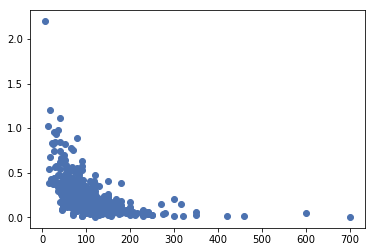

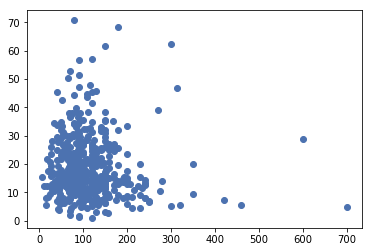

In [138]:
plt.figure()
plt.scatter(data['HSRF'],np.divide(data_orig['Formaldehyde'],data['HSRF']))
# plt.axis([0, 220, 0, 2.5])

plt.figure()
plt.scatter(data['HSRF'],data_orig['Formaldehyde'])
# plt.axis([0, 220, 0, 70])


In [190]:
# create new variable based on ratio of form to house size
formaldehyde = data_orig['Formaldehyde']
form_norm = pd.DataFrame(columns=['form_norm'])
form_norm['form_norm'] = np.divide(data_orig['Formaldehyde'],data['HSRF'])

# find quartiles formaldehyde
f1 = formaldehyde.quantile(0.25)
f2 = formaldehyde.quantile(0.5)
f3 = formaldehyde.quantile(0.75)
# 11.705
# 16.005
# 23.6324

# find quartiles form_norm
l1 = form_norm.quantile(0.25)
l2 = form_norm.quantile(0.5)
l3 = form_norm.quantile(0.75)

print(f1)
print(f2)
print(f3)

11.705
16.005
23.632499999999997


In [147]:
# concat form values with form_norm values
form_and_norm = pd.concat([formaldehyde, form_norm],axis=1)
form_and_norm.head()

,Formaldehyde,form_norm
0,12.26,1.021667
1,10.17,0.145286
2,21.55,0.538750
3,11.03,0.147067
4,16.99,0.339800


In [195]:
# quantise form based on form_norm quartiles
form2 = []
# for each element in formaldehyde
for i in range (0,len(form_and_norm['form_norm'])):
    if form_and_norm['form_norm'][i] <= 0.105:
        form2.append('1')
    if form_and_norm['form_norm'][i] > 0.105 and form_and_norm['form_norm'][i] <= 0.284:
        form2.append('2')
    if form_and_norm['form_norm'][i] > 0.284:
        form2.append('3')

form3 = []
for i in range (0,len(formaldehyde)):
    if formaldehyde[i] <= 11.7:
        form3.append(1)
    if formaldehyde[i] > 11.7 and formaldehyde[i] <= 23.63:
        form3.append(2)
    if formaldehyde[i] > 23.63:
        form3.append(3)
        
print(len(form3))

530


In [342]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

form2_df = pd.DataFrame(form2,columns=['form_qual'])
form3_df = pd.DataFrame(form3,columns=['form_qual'])

# hab_qual_def = hab_qual[['VoitureDansGarage.DGG3n','Fumeurs.FUMEURn','Bricolage.TMG6n','Jardinage.TMG7n']]
# men_qual_def = men_qual[['Diplome_Max','Type_Prof','Occupation','Source_ppale_Res']]

# qualvars = data[['VoitureDansGarage.DGG3n','TraitementParasitesAnimaux.ANTCPn','Jardinage.TMG7n','Nb_Enfants_inf_10']]
qualvars = data[['VoitureDansGarage.DGG3n','Fumeurs.FUMEURn','Bricolage.TMG6n','Jardinage.TMG7n']]

# make dtype category so dummies method works
for i in range(0,qualvars.shape[1]):
    qualvars[qualvars.columns[i]] = qualvars[qualvars.columns[i]].astype('category')
    
for i in range(0,form2_df.shape[1]):
    form2_df[form2_df.columns[i]] = form2_df[form2_df.columns[i]].astype('category')

for i in range(0,form3_df.shape[1]):
    form3_df[form3_df.columns[i]] = form3_df[form3_df.columns[i]].astype('category')

# make one-hot dummies of x and y
qualvars_dummies = pd.get_dummies(qualvars)
fdh_dummies2 = pd.get_dummies(form2_df)
fdh_dummies3 = pd.get_dummies(form3_df)

varnum = len(qualvars_dummies.columns)
X_train, X_test, y_train, y_test = train_test_split(qualvars_dummies, fdh_dummies3, test_size=0.10)

mlpclassifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(varnum, 2), random_state=1)
mlpclassifier.fit(X_train, y_train)

# cvscore = cross_val_score(mlpclassifier, qualvars_dummies, fdh_dummies2, cv=10)
# print(cvscore)
# print(np.mean(cvscore))

prediction = mlpclassifier.predict(X_test)
accuracy_score(y_test, prediction)


0.33962264150943394

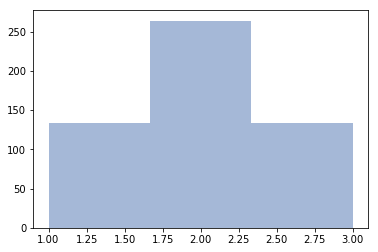

In [334]:
# form3_df.head()

plt.figure()
# form3_df['form_qual'].hist()

plt.hist(np.array(form3), bins=3, alpha=0.5)
# plt.title('Random Gaussian data (fixed bin size)')
# plt.xlabel('variable X (bin size = 5)')
# plt.ylabel('count')

plt.show()

In [205]:
# X_train.head()
# print(prediction)
# print(y_test)
# print(X_test)
# data[['VoitureDansGarage.DGG3n','TraitementParasitesAnimaux.ANTCPn','Jardinage.TMG7n','Nb_Enfants_inf_10','NIACe1']]

qualvars_dummies.head()
# fdh_dummies.head()

,VoitureDansGarage.DGG3n_1,VoitureDansGarage.DGG3n_2,VoitureDansGarage.DGG3n_3,VoitureDansGarage.DGG3n_4,Fumeurs.FUMEURn_1,Fumeurs.FUMEURn_2,Fumeurs.FUMEURn_3,Fumeurs.FUMEURn_4,Bricolage.TMG6n_1,Bricolage.TMG6n_2,Bricolage.TMG6n_3,Bricolage.TMG6n_4,Bricolage.TMG6n_5,Jardinage.TMG7n_1,Jardinage.TMG7n_2,Jardinage.TMG7n_3,Jardinage.TMG7n_4,Jardinage.TMG7n_5
0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0
